# CODETECH Internship – Task 4: Coffee Sentiment Analysis

**Objective:**  
Perform sentiment analysis on coffee reviews using NLP techniques to classify them as Positive, Negative, or Neutral.

**Dataset:**  
- `coffee_analysis.csv` (inside `data/` folder)

**Tools & Libraries:**  
- Python, Pandas, Matplotlib, Seaborn  
- TextBlob / NLTK VADER for sentiment analysis  
- WordCloud for visualization


## Step 1: Import Required Libraries
We import all necessary libraries for data processing, sentiment analysis, and visualization.

In [3]:
# Data manipulation
import pandas as pd

# Text processing
import re

# Sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Step 2: Load Dataset
Load the coffee reviews dataset and inspect the first few rows.


In [6]:
df = pd.read_csv("/content/coffee_analysis.csv")
df.head()


,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


In [8]:
df.columns


Index(['name', 'roaster', 'roast', 'loc_country', 'origin_1', 'origin_2',
       '100g_USD', 'rating', 'review_date', 'desc_1', 'desc_2', 'desc_3'],
      dtype='object')

In [9]:
# Combine all description columns into one 'review_text' column
df['review_text'] = df['desc_1'].fillna('') + ' ' + df['desc_2'].fillna('') + ' ' + df['desc_3'].fillna('')
df['review_text'] = df['review_text'].str.strip()  # remove extra spaces
df[['desc_1','desc_2','desc_3','review_text']].head()


,desc_1,desc_2,desc_3,review_text
0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...,"Evaluated as espresso. Sweet-toned, deeply ric..."
1,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ...","Evaluated as espresso. Sweetly tart, floral-to..."
2,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce...","Crisply sweet, cocoa-toned. Lemon blossom, roa..."
3,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...,"Delicate, sweetly spice-toned. Pink peppercorn..."
4,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...,"Deeply sweet, subtly pungent. Honey, pear, tan..."


## Step 3: Clean the Text Data
We preprocess the text data to remove URLs, punctuation, numbers, and convert everything to lowercase.


In [10]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove non-letters
    return text

df['cleaned_text'] = df['review_text'].apply(clean_text)
df[['review_text','cleaned_text']].head()


,review_text,cleaned_text
0,"Evaluated as espresso. Sweet-toned, deeply ric...",evaluated as espresso sweettoned deeply rich c...
1,"Evaluated as espresso. Sweetly tart, floral-to...",evaluated as espresso sweetly tart floraltoned...
2,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",crisply sweet cocoatoned lemon blossom roasted...
3,"Delicate, sweetly spice-toned. Pink peppercorn...",delicate sweetly spicetoned pink peppercorn da...
4,"Deeply sweet, subtly pungent. Honey, pear, tan...",deeply sweet subtly pungent honey pear tangeri...


## Step 4: Sentiment Analysis
We classify reviews as Positive, Negative, or Neutral using VADER sentiment analyzer.


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['vader_score'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['vader_score'].apply(lambda x: "Positive" if x>0 else ("Negative" if x<0 else "Neutral"))

df[['cleaned_text','sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_text,sentiment
0,evaluated as espresso sweettoned deeply rich c...,Positive
1,evaluated as espresso sweetly tart floraltoned...,Positive
2,crisply sweet cocoatoned lemon blossom roasted...,Positive
3,delicate sweetly spicetoned pink peppercorn da...,Positive
4,deeply sweet subtly pungent honey pear tangeri...,Positive


## Step 5: Visualize Sentiment Results
We create plots to better understand the sentiment distribution.


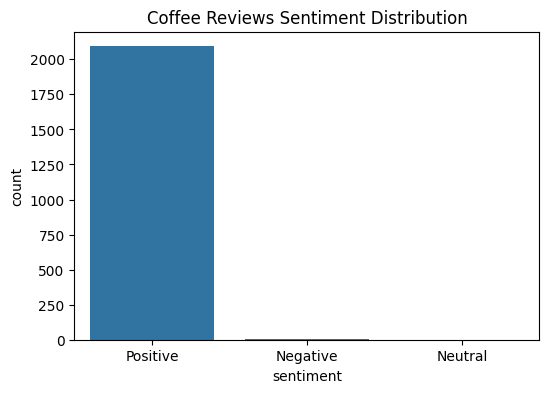

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Coffee Reviews Sentiment Distribution")
plt.show()


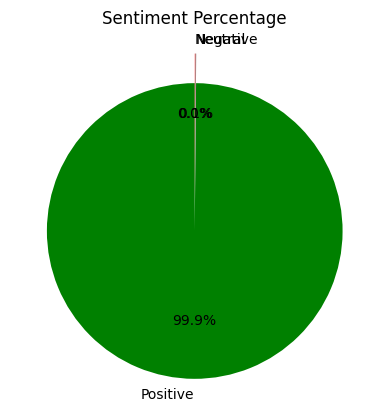

In [26]:
import matplotlib.pyplot as plt

# Pie chart settings
colors = ['green','grey','red']  # Positive, Neutral, Negative
explode = (0.1, 0.1, 0.1)  # slightly separate all slices

# Plot
df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90
)
plt.title("Sentiment Percentage")
plt.ylabel("")  # hide the y-label
plt.show()




## Step 6: WordCloud Reviews
Generate a word cloud to visualize frequently used words in positive reviews.


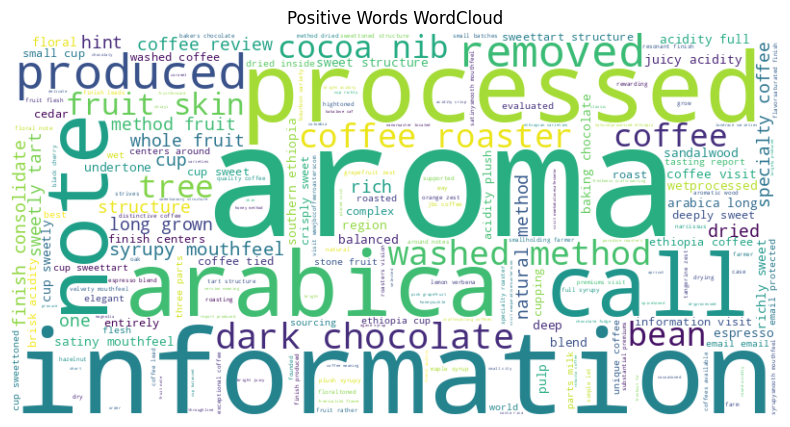

In [22]:
# WordCloud for Positive Reviews
positive_text = " ".join(df[df['sentiment']=="Positive"]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Words WordCloud")
plt.savefig("plots/positive_wordcloud.png")
plt.show()


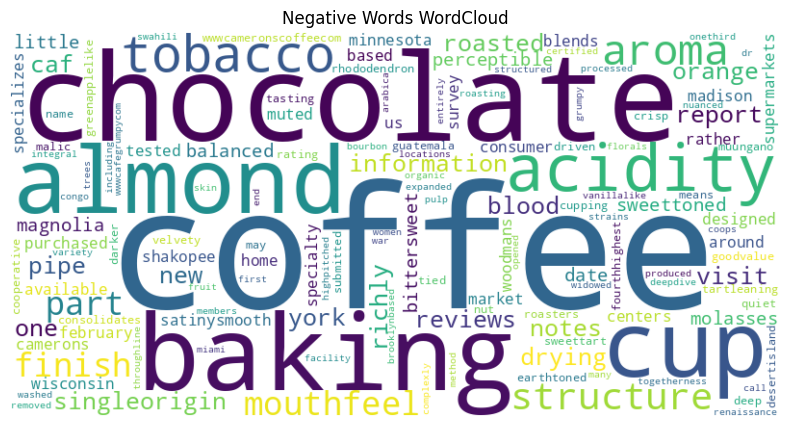

In [23]:
# WordCloud for Positive Reviews
negative_text = " ".join(df[df['sentiment']=="Negative"]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Words WordCloud")
plt.savefig("plots/negative_wordcloud.png")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


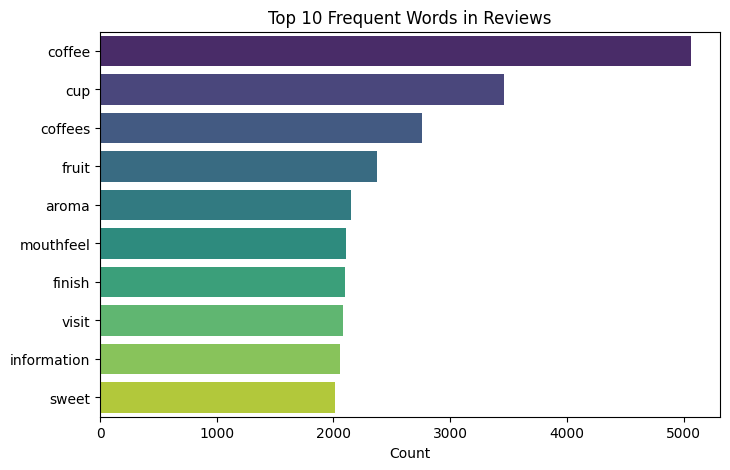

In [27]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
all_words = " ".join(df['cleaned_text']).split()
filtered_words = [w for w in all_words if w not in stop_words]
top_words = Counter(filtered_words).most_common(10)

words, counts = zip(*top_words)
plt.figure(figsize=(8,5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 10 Frequent Words in Reviews")
plt.xlabel("Count")
plt.savefig("plots/top10_words.png")
plt.show()


##Step 7: Save Cleaned Dataset
Optionally, we save the cleaned dataset with sentiment labels for future use.

In [18]:
import os

# Make sure the data folder exists
os.makedirs("data", exist_ok=True)

# Save cleaned dataset
df.to_csv("data/coffee_analysis_cleaned.csv", index=False)
print("Cleaned dataset saved to data/coffee_analysis_cleaned.csv")



Cleaned dataset saved to data/coffee_analysis_cleaned.csv
